## Importing dataset

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets


In [2]:
header=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", names=header, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

###  First we need to scale the data 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()

In [6]:
scaler.fit(df.drop('MEDV',axis=1))
scaled_features = scaler.transform(df.drop('MEDV',axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


## Splitting the data into 60% train, 20% crossvalidation, 20% test

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_Train60, X_Test40, Y_Train60, Y_Test40 = train_test_split(scaled_features,df['MEDV'],
                                                    test_size=0.40)
X_cv, X_Test20, Y_cv, Y_test20 = train_test_split(X_Test40,Y_Test40,test_size=0.5)

### Training the model for multiple degrees of Linear Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [11]:
Mse=[]
degrees=np.arange(1,10)
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)
    x_poly_train=poly_features.fit_transform(X_Train60)
    #Applying Linear Regression
    poly_reg = LinearRegression()
    model=poly_reg.fit(x_poly_train, Y_Train60)
    #Comparing values with CV
    x_poly_cv = poly_features.fit_transform(X_cv)
    poly_predict = model.predict(x_poly_cv)
    poly_mse = mean_squared_error(Y_cv, poly_predict)
    Mse.append(poly_mse)
min_deg=degrees[Mse.index(min(Mse))]

print("The smallest error is {} with equivalent degree of {}".format(min(Mse),min_deg))
  

The smallest error is 11.942495496046158 with equivalent degree of 2


Text(0.5, 1.0, 'Graph of predicted prices versus actual prices')

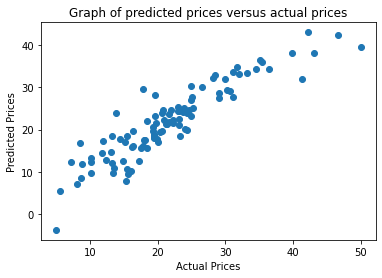

In [12]:
#Applying the polynomial regression to Y_test
poly_features_test=PolynomialFeatures(degree=min_deg,include_bias=False)
x_poly_test=poly_features_test.fit_transform(X_Train60)
#Applying Linear Regression
poly_reg_test = LinearRegression()
model2=poly_reg_test.fit(x_poly_test,Y_Train60)
#Comparing values with Test
poly_predict_test=poly_features_test.fit_transform(X_Test20)
Y_predicted_test=model2.predict(poly_predict_test)

poly_mse=mean_squared_error(Y_test20, Y_predicted_test)
plt.scatter(Y_test20,Y_predicted_test);
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Graph of predicted prices versus actual prices")


## Applying Regularization

In [13]:
from sklearn.linear_model import Ridge

In [14]:
alphas=[0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
err_reg=[]
for alpha in alphas:
    ridge_feat=Ridge(alpha=alpha)
    ridge_feat.fit(x_poly_test,Y_Train60)
    #pred_train_reg= ridge_feat.predict(x_poly_test)
    #Comparing values with Cv
    x_poly_cv = poly_features_test.fit_transform(X_cv)
    #x_reg_cv=ridge_feat.fit(x_poly_cv,Y_cv)
    poly_reg_predict = ridge_feat.predict(x_poly_cv)
    poly_reg_mse = mean_squared_error(Y_cv, poly_reg_predict)
    err_reg.append(poly_reg_mse)
min_alpha=alphas[err_reg.index(min(err_reg))]

print("The smallest error is {} with equivalent alpha of {}".format(min(err_reg),min_alpha))

    

The smallest error is 11.63226665082311 with equivalent alpha of 10.24


Mean square error after regularization 10.32280094673422


Text(0.5, 1.0, 'Graph of predicted prices versus actual prices')

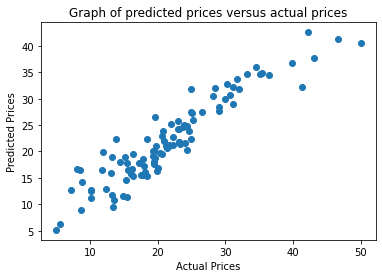

In [15]:
#Applying the regularization regression to Y_test
ridge_test=Ridge(alpha=min_alpha)
ridge_test.fit(x_poly_test,Y_Train60)

#Comparing values with Test
poly_reg_predict_test=poly_features_test.fit_transform(X_Test20)
Y_reg_predicted_test=ridge_test.predict(poly_reg_predict_test)

poly_mse_after_reg=mean_squared_error(Y_test20, Y_reg_predicted_test)
print("Mean square error after regularization {}".format(poly_mse_after_reg))
plt.scatter(Y_test20,Y_reg_predicted_test);
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Graph of predicted prices versus actual prices")

In [16]:
print("Coefficients are {}".format(ridge_test.coef_))
print("Intercept in {}".format(ridge_test.intercept_))


Coefficients are [-0.16518132 -0.22004029  0.07993473  0.10956269 -1.65723282  2.8494989
 -0.65254733 -2.12273394  0.604408   -0.93810919 -0.44049895  0.50034041
 -3.08864635  0.00415429  0.16970702  0.02244235  2.07583909 -0.27540794
  0.51287633  0.35152902  0.11839388 -0.41172544  0.3027179  -0.04526202
 -0.01105991  0.15144452  0.21819525  0.10071944  0.02254913  0.22730017
  0.10837193 -0.13281496 -0.19363646 -0.42343047  0.58623997  0.02392973
  0.14514702 -0.33698192  0.45051829  0.44865451  0.8451974   0.18191915
  0.57464972  0.87986308 -0.11426168  0.10429084 -0.41772831  0.32278847
 -0.29941209  0.3720529  -1.08347995 -0.48662291  0.30029675  0.30018503
 -0.22109211  0.78046587 -0.26305477 -0.01759353 -0.35544885 -0.2334601
 -0.27473089 -0.58950124  0.83933992 -1.22472144 -0.4530351  -0.67383831
 -0.45801337  0.60073125  0.05607987 -0.77517582  0.329819   -0.49645617
 -1.23236367 -1.111772   -0.43823798 -1.07399567  0.12989802  0.05225057
  1.33819987  0.1834396  -0.03823105

In [17]:
print('Coefficient of determination (R^2) before regularization: %.2f' %r2_score(Y_test20, Y_predicted_test))
print('Coefficient of determination (R^2) after regularization: %.2f' %r2_score(Y_test20, Y_reg_predicted_test))

Coefficient of determination (R^2) before regularization: 0.83
Coefficient of determination (R^2) after regularization: 0.87


We can conclude that the regularization improved the performance of the algorithm by 5% 